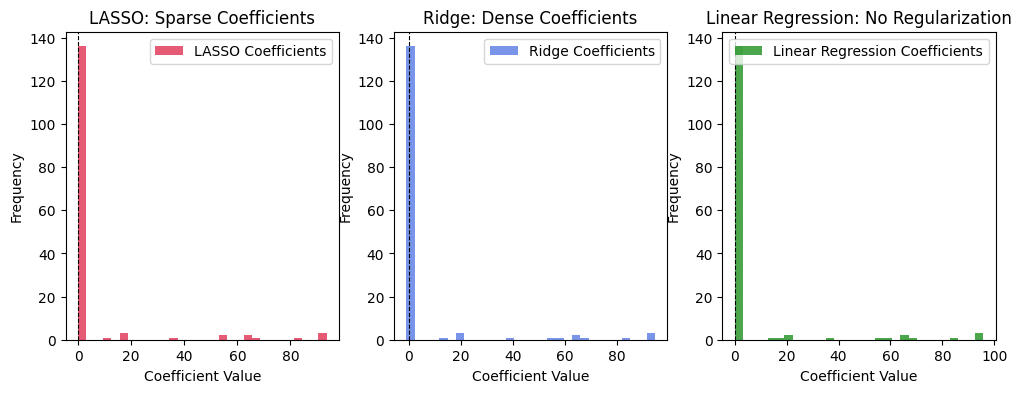

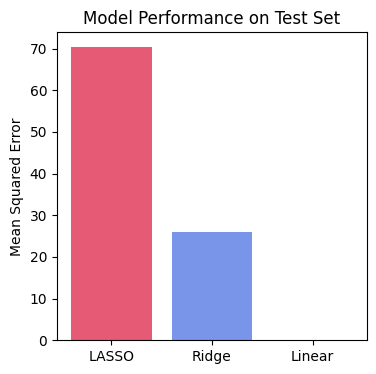

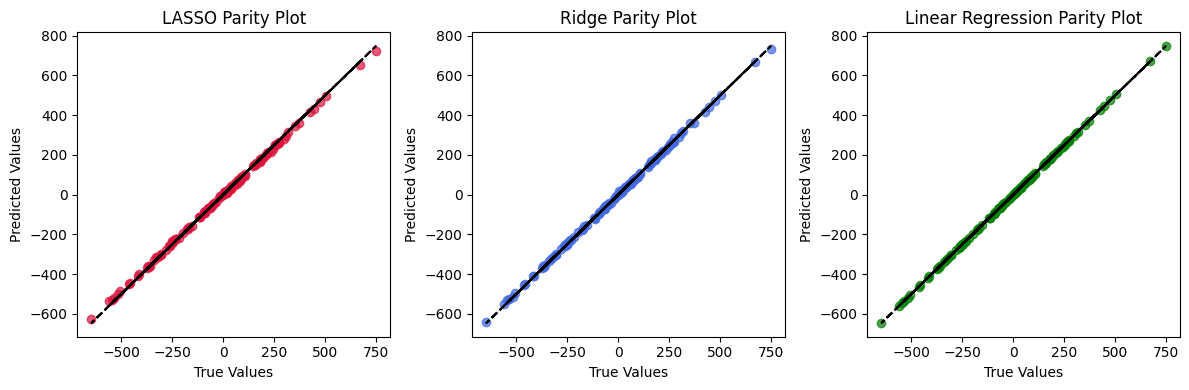

LASSO non-zero coefficients: 14
Ridge non-zero coefficients: 150
Linear Regression non-zero coefficients: 148
LASSO Test MSE: 70.3914
Ridge Test MSE: 25.8799
Linear Regression Test MSE: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
n_samples, n_features = 400, 150
X, y, true_coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=15, noise=0, coef=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit LASSO, Ridge, and LinearRegression models
regul = 2.0
lasso = Lasso(alpha=regul)
ridge = Ridge(alpha=regul)
linear = LinearRegression()
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)

# Evaluate performance
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
linear_pred = linear.predict(X_test)

# Evaluate performance
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
linear_mse = mean_squared_error(y_test, linear.predict(X_test))

# Compare the coefficients
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(lasso.coef_, bins=30, color='crimson', alpha=0.7, label='LASSO Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('LASSO: Sparse Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(ridge.coef_, bins=30, color='royalblue', alpha=0.7, label='Ridge Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Ridge: Dense Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(linear.coef_, bins=30, color='green', alpha=0.7, label='Linear Regression Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Linear Regression: No Regularization')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

# Plot model performance
plt.figure(figsize=(4, 4))
plt.bar(['LASSO', 'Ridge', 'Linear'], [lasso_mse, ridge_mse, linear_mse], color=['crimson', 'royalblue', 'green'], alpha=0.7)
plt.title('Model Performance on Test Set')
plt.ylabel('Mean Squared Error')

# Parity plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lasso_pred, color='crimson', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('LASSO Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, ridge_pred, color='royalblue', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Ridge Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, linear_pred, color='green', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Linear Regression Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Inspect the number of non-zero coefficients
print(f"LASSO non-zero coefficients: {np.sum(lasso.coef_ != 0)}")
print(f"Ridge non-zero coefficients: {np.sum(ridge.coef_ != 0)}")
print(f"Linear Regression non-zero coefficients: {np.sum(linear.coef_ != 0)}")

print(f"LASSO Test MSE: {lasso_mse:.4f}")
print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Linear Regression Test MSE: {linear_mse:.4f}")
